# Introduction
## Dataset 1: Police Blotter Archived Data 
For my visualization, I selected the Police Blotter Archived dataset. I chose this dataset over the current 30-day dataset as the archived data would be better to analyze trends over months and even years. This dataset contains information about where police are dispatched to and the offenses that have occurred. In order to select and determine the best neighborhood from this data, it will be the one with the least police presence and the violence of the offenses will be taken into account as well.

In [41]:
# import necessary libraries and data
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

police_blotter_data = pd.read_csv('https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e',index_col="INCIDENTTIME", parse_dates = True)

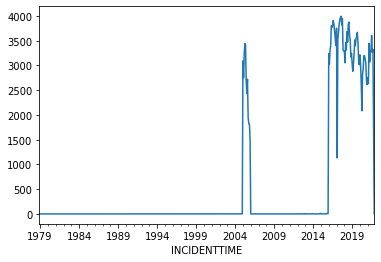

In [42]:
# first experimentation, graph by time
police_blotter_data.resample("M").size().plot()

## Initial Impressions of the Data
My initial impressions of the data showed that the first collection point started in 1979. However, it flatlined and peaked again around 2005 then dipped again until 2016. It was here that I had a hunch that the project was halted and then began again. Because of the lack of data collection consistency, I decided to only analyze the data from 2016 - Current. Because of this, the next step would be to filter by date from 2016 - 2021. I also decided to get rid of any entries that had incomplete data such as an empty neighborhood value, offenses, etc.

In [43]:
# code to only examine from 2016 - 2021 and drop any N/A categories
police_blotter_wanted = police_blotter_data.loc['2016':'2021']
neighborhood_filter1 = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] != "Outside City"
neighborhood_filter2 = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] != "Outside County"
neighborhood_filter3 = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] != "Outside State"
police_blotter_wanted = police_blotter_wanted.where(neighborhood_filter1)
police_blotter_wanted = police_blotter_wanted.where(neighborhood_filter2)
police_blotter_wanted = police_blotter_wanted.where(neighborhood_filter3)
police_blotter_wanted = police_blotter_wanted.dropna()

police_blotter_wanted

,PK,CCR,HIERARCHY,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTTIME,,,,,,,,,,,,,,
2016-01-01 00:00:00,2802309.0,16000001.0,10.0,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
2016-01-01 00:01:00,2803174.0,16004547.0,11.0,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2016-01-01 00:10:00,2801809.0,16000367.0,4.0,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
2016-01-01 00:15:00,2802315.0,16000035.0,10.0,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
2016-01-01 00:16:00,2802312.0,16000024.0,4.0,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08 21:55:00,3267575.0,21164639.0,26.0,"20 Block Kenwood AV Pittsburgh, PA 15214",Y,Perry South,1,PROTECTIVE ORDERS,9093 Indirect Criminal Contempt,2614.0,6.0,1.0,-80.009328,40.469360
2021-09-07 18:00:00,3267576.0,21164641.0,14.0,"N Craig ST & Baum BL Pittsburgh, PA 15213",N,North Oakland,4,CRIMINAL MISCHIEF (AUTO),3304 Criminal Mischief.,507.0,6.0,3.0,-79.953337,40.454002
2021-09-08 23:00:00,3267578.0,21164658.0,11.0,"5400 Block Penn AV Pittsburgh, PA 15206",Y,Garfield,5,THEFT OF SERVICES,2709(a) Harassment. / 3304 Criminal Mischief. ...,1114.0,9.0,2.0,-79.936417,40.464663


## First Manipulation

After obtaining the data I wanted to work with, I decided on a couple of things I could do to manipulate the data and make it easier to further analyze. These goals included:

- Analyze trends over the years of each neighborhood
- Translate data to quantitative values
- Create a metric where both severity of crime and frequency of crimes committed is accounted for

In [44]:
police_blotter_data['INCIDENTNEIGHBORHOOD'].value_counts()

South Side Flats             15159
Central Business District    13565
Carrick                       9213
Bloomfield                    7079
Shadyside                     6776
                             ...  
Chartiers City                 246
Outside State                  245
Outside County                 177
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 81
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

In [45]:
police_blotter_data['INCIDENTHIERARCHYDESC'].value_counts()

THEFT FROM AUTO                              14088
THEFT/ALL OTHERS                             12222
SIMPLE ASSAULT/INJURY                        10196
CRIMINAL MISCHIEF (AUTO)                      9487
CRIMINAL MISCHIEF                             7015
                                             ...  
WEAR OF UNIFORMS/INSIGNIA                        1
UNLAW LISTEN DELIB. OF JURY                      1
ASSAULT BY PRISONER/STRONGARM                    1
UNAUTHORIZED SCHOOL BUS ENTRY (ATT THEFT)        1
ARSON (OTHER STRUCTURE-OCCUP)                    1
Name: INCIDENTHIERARCHYDESC, Length: 308, dtype: int64

## Analysis 1
From obtaining the counts of incidents in each neighborhood and the number of types of incident hierarchies description, there would be too many different types to assign a value to. Therefore, I decided to settle on assigning numerical values to hierarchy. Hierarchy according to the data dictionary (and through further research), meant that each incident that the police responded to is assigned a value that is the highest "crime" even if multiple offenses were committed. However with 30+ different values, I decided to group certain hierachies together using information obtained from this [link](https://www.ucr.pa.gov/PAUCRSPUBLIC/Publication/Active/2018%20Annual%20Uniform%20Crime.pdf) and assign each group certain score values.

In [46]:
violence_score_tiers = [
    (police_blotter_wanted["HIERARCHY"] <= 4),
    (police_blotter_wanted["HIERARCHY"] > 4) & (police_blotter_wanted["HIERARCHY"] <= 9),
    (police_blotter_wanted["HIERARCHY"] == 15),
    (police_blotter_wanted["HIERARCHY"] >= 10) & (police_blotter_wanted["HIERARCHY"] <= 14),
    (police_blotter_wanted["HIERARCHY"] == 19),
    (police_blotter_wanted["HIERARCHY"] >= 16) & (police_blotter_wanted["HIERARCHY"] <= 18),
    (police_blotter_wanted["HIERARCHY"] >= 21) & (police_blotter_wanted["HIERARCHY"] <= 23),
    (police_blotter_wanted["HIERARCHY"] >= 24) & (police_blotter_wanted["HIERARCHY"] <= 26),
    (police_blotter_wanted["HIERARCHY"] == 20),
    (police_blotter_wanted["HIERARCHY"] >= 27)
]

violence_score_values = [15, 12, 12, 8, 8, 10, 10, 6, 6, 3]

police_blotter_wanted["Violence Score"] = np.select(violence_score_tiers, violence_score_values)
police_blotter_wanted.head()

,PK,CCR,HIERARCHY,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,Violence Score
INCIDENTTIME,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2802309.0,16000001.0,10.0,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263,8
2016-01-01 00:01:00,2803174.0,16004547.0,11.0,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290,8
2016-01-01 00:10:00,2801809.0,16000367.0,4.0,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651,15
2016-01-01 00:15:00,2802315.0,16000035.0,10.0,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918,8
2016-01-01 00:16:00,2802312.0,16000024.0,4.0,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651,15


## Second Manipulation
The next step is to manipulate and use the violence score column that was just created. In order to do so, I decided to plot this data on a bar chart by taking each neighborhood and its total violence score over the course from 2016 - 2021. I also decided to take the mean of the violence score. Taking the mean eliminates the size and population of the neighborhood and indicates the sheer violence of the crime.

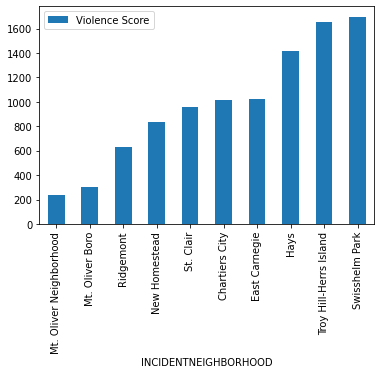

In [47]:
total_vio_score_all_years = just_vio_score_data.groupby("INCIDENTNEIGHBORHOOD").sum()
total_vio_years_srt = total_vio_score_all_years.sort_values("Violence Score")
total_vio_years_srt.head(10).plot(kind = "bar")

(8.5, 9.75)

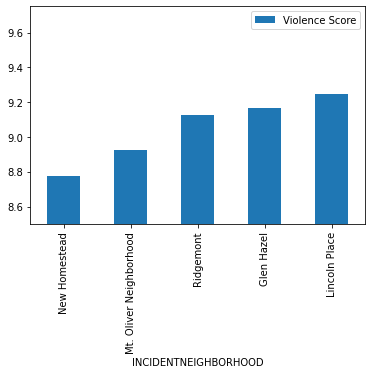

In [48]:
just_vio_score_data = police_blotter_wanted[["INCIDENTNEIGHBORHOOD","Violence Score"]]
mean_vio_data = just_vio_score_data.groupby("INCIDENTNEIGHBORHOOD")["Violence Score"].mean().sort_values()
mean_vio_data.head().plot(kind = "bar")
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(8.5, 9.75)

## Analysis 2 
The next step is to find where the neighborhoods had both the least mean violence score and least total violence score. While just from a quick glance it can be noted that New Homestead, Mount Oliver, and a couple others are shared. I decided to just run a for loop and take the similarities of the lowest 20 as that resulted in a desirable number of neighborhoods.

In [49]:
i = 0
j = 0
key_neighborhood = []
for i in range(20):
    for j in range(20):
        if mean_vio_data.index[j] == total_vio_years_srt.index[i]:
            key_neighborhood.append(mean_vio_data.index[j])

for neighborhoods in key_neighborhood:
    print(neighborhoods)

Mt. Oliver Neighborhood
Mt. Oliver Boro
Ridgemont
New Homestead
East Carnegie
Mount Oliver
Glen Hazel
Fairywood


## Manipulation and Analysis 3
After obtaining the similar neighborhoods shared, I decided to plot the mean violence score of those neighborhoods over time to see if any neighborhoods were becoming more violent. However, it seems that most of them follow a cyclical pattern with sum peaking in the middle of the year while others peaking in the winter months. However, by analyzing for a decreasing violence trend, it seems that East Carnegie, Mount Oliver, and New Homestead have a decreasing mean violence trend and a sharp decrease at the moment. To further back this up I decided to graph the sum of the violence score as well over the years. Among the three neighborhoods, East Carnegie and Mount Oliver also have a sharp decreasing total violence scores.

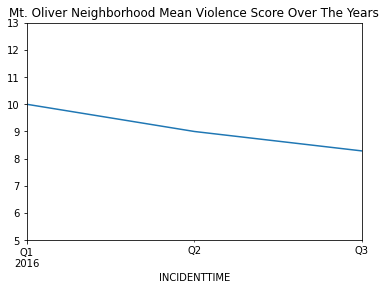

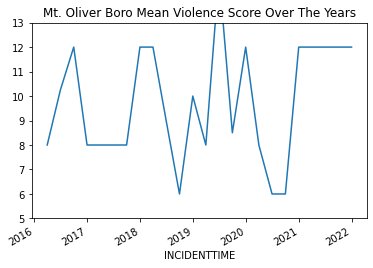

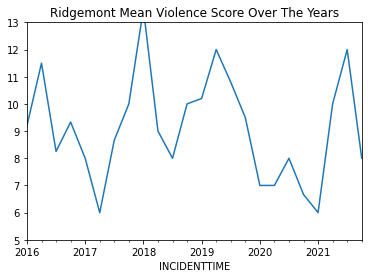

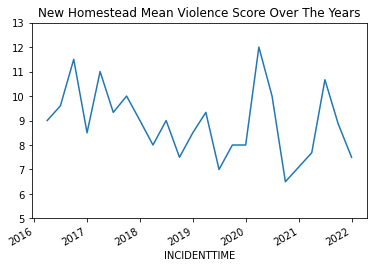

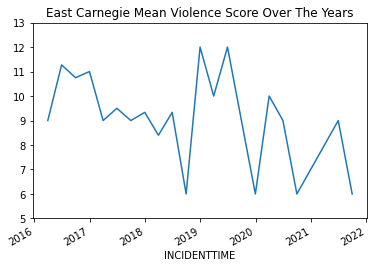

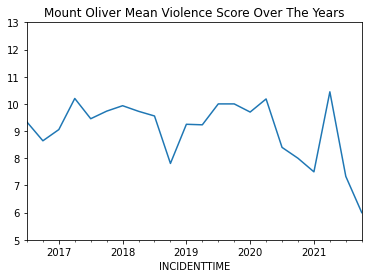

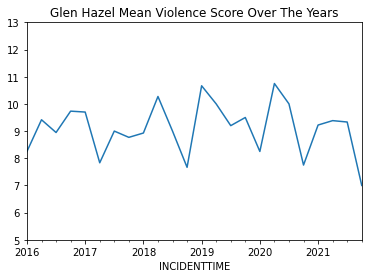

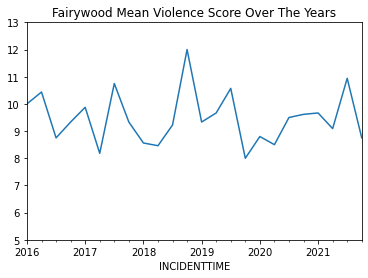

In [50]:
i = 0
for i in range(len(key_neighborhood)):
    key_neighborhood_filter = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] == key_neighborhood[i]
    # print(key_neighborhood[i])
    key_neighborhood1_data = police_blotter_wanted.where(key_neighborhood_filter)
    key_neighborhood1_data = key_neighborhood1_data.dropna()
    key_neighborhood1_data = key_neighborhood1_data.resample("Q").mean()
    key_neighborhood1_data = key_neighborhood1_data.dropna()
    plt.figure()
    key_neighborhood1_data["Violence Score"].plot()
    plt.ylim(5, 13)
    plt.title(key_neighborhood[i] + " Mean Violence Score Over The Years")

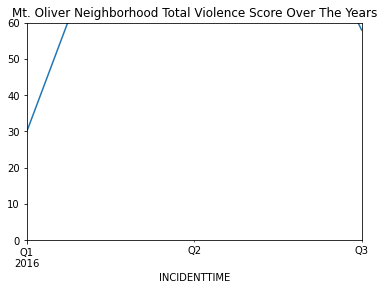

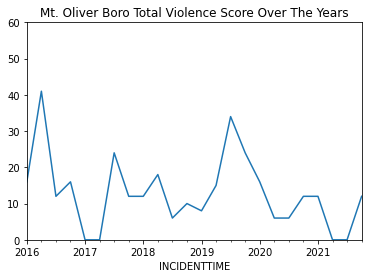

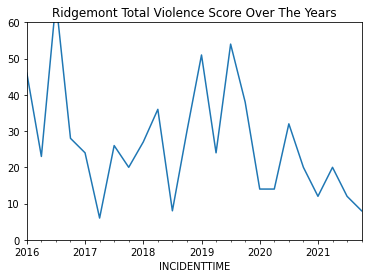

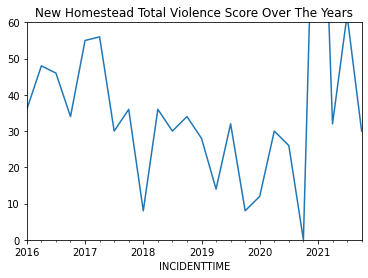

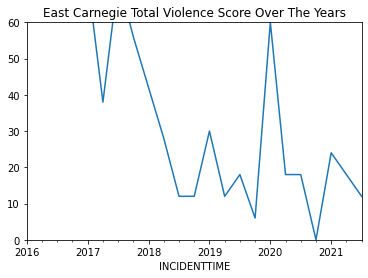

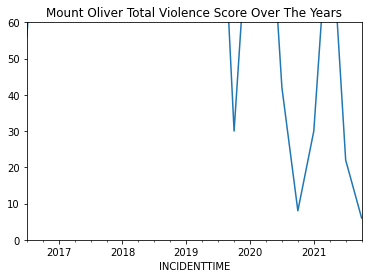

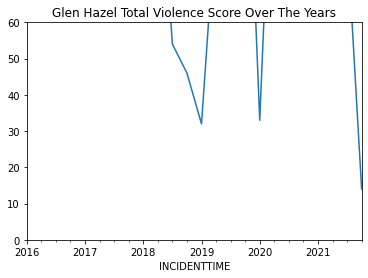

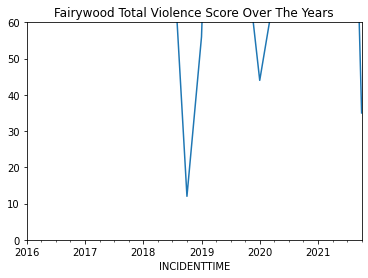

In [54]:
i = 0
for i in range(len(key_neighborhood)):
    key_neighborhood_filter = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] == key_neighborhood[i]
    # print(key_neighborhood[i])
    key_neighborhood1_data = police_blotter_wanted.where(key_neighborhood_filter)
    key_neighborhood1_data = key_neighborhood1_data.dropna()
    key_neighborhood1_data = key_neighborhood1_data.resample("Q").sum()
    key_neighborhood1_data = key_neighborhood1_data.dropna()
    plt.figure()
    key_neighborhood1_data["Violence Score"].plot()
    plt.ylim(0, 60)
    plt.title(key_neighborhood[i] + " Total Violence Score Over The Years")

## Manipulation 4
For the next manipulation of the data, I decided to involve the creation of maps. But instead of of just creating one, I ended up creating 72 of them and create a gif.

In [ ]:
neighborhood_map = geopandas.read_file("Neighborhoods_.shp")
neighborhood_map.plot()

In [ ]:
# isolated 2016 data and separated by month (did this another 5 times for each year and its months)
data_2016 = police_blotter_wanted.loc["2016"]
data_jan_2016 = data_2016.loc["1-1-2016":"1-31-2016"]
data_feb_2016 = data_2016.loc["2-1-2016":"2-29-2016"]
data_mar_2016 = data_2016.loc["3-1-2016":"3-31-2016"]
data_apr_2016 = data_2016.loc["4-1-2016":"4-30-2016"]
data_may_2016 = data_2016.loc["5-1-2016":"5-31-2016"]
data_jun_2016 = data_2016.loc["6-1-2016":"6-30-2016"]
data_jul_2016 = data_2016.loc["7-1-2016":"7-31-2016"]
data_aug_2016 = data_2016.loc["8-1-2016":"8-31-2016"]
data_sep_2016 = data_2016.loc["9-1-2016":"9-30-2016"]
data_oct_2016 = data_2016.loc["10-1-2016":"10-31-2016"]
data_nov_2016 = data_2016.loc["11-1-2016":"11-30-2016"]
data_dec_2016 = data_2016.loc["12-1-2016":"12-31-2016"]

# filtered and found the mean score (did this another 5 times for each year and its months)
data_jan2016_fltrd = data_jan_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_feb2016_fltrd = data_feb_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_mar2016_fltrd = data_mar_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_apr2016_fltrd = data_apr_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_may2016_fltrd = data_may_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_jun2016_fltrd = data_jun_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_jul2016_fltrd = data_jul_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_aug2016_fltrd = data_aug_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_sep2016_fltrd = data_sep_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_oct2016_fltrd = data_oct_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_nov2016_fltrd = data_nov_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_dec2016_fltrd = data_dec_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]

# merged the map columns
avg_vio_score_jan2016 = neighborhood_map.merge(data_jan2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_feb2016 = neighborhood_map.merge(data_feb2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_mar2016 = neighborhood_map.merge(data_mar2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_apr2016 = neighborhood_map.merge(data_apr2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_may2016 = neighborhood_map.merge(data_may2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_jun2016 = neighborhood_map.merge(data_jun2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_jul2016 = neighborhood_map.merge(data_jul2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_aug2016 = neighborhood_map.merge(data_aug2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_sep2016 = neighborhood_map.merge(data_sep2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_oct2016 = neighborhood_map.merge(data_oct2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_nov2016 = neighborhood_map.merge(data_nov2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_dec2016 = neighborhood_map.merge(data_dec2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

# Plotted and displayed each graph and saved as an image to then export to make a gif
avg_vio_score_jan2016.plot(column='Violence Score', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Mean Violence Score"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.title("Jan 2016")
integer_title = 1
title = str(integer_title)
plt.savefig(title)
integer_title = integer_title + 1

<img src="map.gif">

## Analysis 4
The map GIF further solidifies that from month to month the mean violence score varies and fluctuates wildly. Furthermore, it does not offer a clear winner by using a quick glance.

# Conclusion
As a conclusion, using the bar and line graphs, East Carnegie and Mount Oliver seem to fall in line as the best neighborhoods to hide in. With decreasing violence scores all around, the lesser police presence makes for a less chance getting noticed incidentally. This best neighborhood differs from my personal favorite neighborhood simply because I haven't seen much of Pittsburgh. Having never been to East Carnegie or Mount Oliver, not much of a comparison can be made especially since Oakland is currently my favorite simply because it is where Pitt's campus resides.